In [ ]:
# Prophet example, Time series

In [ ]:
# Refrences

In [3]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from prophet import Prophet

In [5]:
%matplotlib inline
sns.set()

pd.set_option('display.float_format', lambda x: '%.1f' % x)

# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.precision", 6)

# optional
#pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')

In [8]:
# load data

# path = 'e:\PycharmProjects\TimeSeries'
path = os.path.abspath(os.getcwd())

# load apple, google data 
peyton_file = 'example_wp_log_peyton_manning.csv'
path_to_peyton_file = os.path.join(path, 'data', peyton_file)
df = pd.read_csv(path_to_peyton_file, parse_dates=["ds"],index_col="ds",).dropna()

In [10]:
df.sample(7)

,y
ds,
2016-01-17,9.27388
2012-07-10,7.78239
2009-01-12,8.73279
2009-09-08,8.12859
2011-07-11,7.77905
2008-12-22,8.62461
2013-07-02,7.28139


In [17]:
# same load reading from github
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.tail()

,ds,y
2900,2016-01-16,7.81722
2901,2016-01-17,9.27388
2902,2016-01-18,10.33378
2903,2016-01-19,9.12587
2904,2016-01-20,8.89137


In [ ]:
#!pip install prophet

In [14]:
m = Prophet()
m.fit(df)

20:13:12 - cmdstanpy - INFO - Chain [1] start processing
20:13:13 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.20660,7.41202,8.93496
3266,2017-01-16,8.53159,7.81368,9.24264
3267,2017-01-17,8.31898,7.57064,9.03361
3268,2017-01-18,8.15164,7.44021,8.88334
3269,2017-01-19,8.16353,7.45404,8.88525


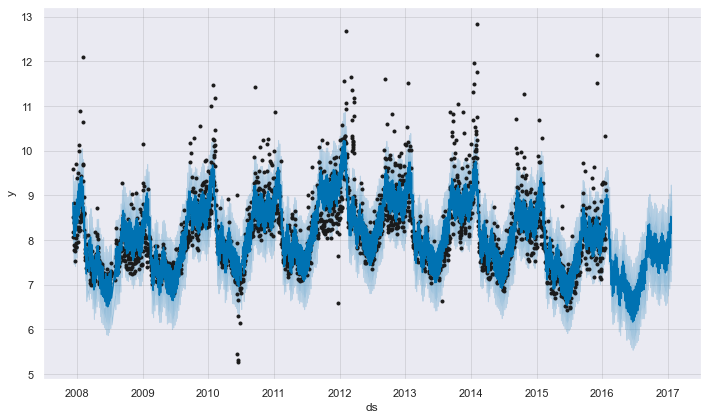

In [18]:
fig1 = m.plot(forecast)

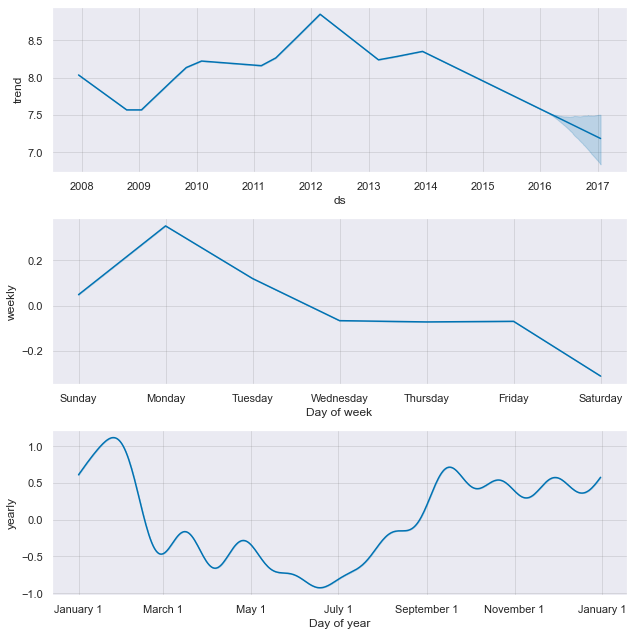

In [19]:
fig2 = m.plot_components(forecast)